# <font color='#080A83'> House Price Prediction </font>

Here is a practical example of each one of the steps in the predictive model building pipeline. There will be a notebook for each one of the steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 1: <font color='#5164A9'>Data Analysis**</font>

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

===================================================================================================

## <font color= '#59045C'> Predicting Sale Price of Houses </font>

The aim of the project is to build a predictive model to predict the sale price of homes in Ames, Iowa based on different explanatory variables describing aspects of residential houses. We will practice data analysis, feature engineering and regression algorithms to achieve the lowest prediction error.

### <font color= '#810000'> Why is this important?  </font>

Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

### <font color= '#810000'>What is the objective of the model?  </font>

We aim to minimise the difference between the real price, and the estimated price by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

### <font color= '#810000'> How do I download the dataset? </font>

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'houseprice.csv' and save it to a directory of your choice.

**Note the following:**
-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the same directory where you saved this jupyter notebook, then you can run the code as it is written here.

====================================================================================================

## <font color= '#59045C'> House Prices dataset: Data Analysis </font>

In the following cells, we will analyse the variables of the House Price Dataset from Kaggle. I will take you through the different aspects of the analysis that we will make over the variables, and introduce you to the meaning of each of the variables as well. If you want to know more about this dataset, visit [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Let's go ahead and load the dataset.

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

[`Seaborn`](https://seaborn.pydata.org/) comes with a number of customized [themes](https://seaborn.pydata.org/tutorial/aesthetics.html) and a high-level interface for controlling the look of matplotlib figures.

In [2]:
# load training & test dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# rows and columns of the train data
print('Dimension : ', train.shape)

# rows and columns of the test data
print('Dimension : ', test.shape)

Dimension :  (1460, 81)
Dimension :  (1459, 80)


In [5]:
print(f'The shape of our training set: {train.shape[0]} houses and {train.shape[1]} features.\n')
print(f'The shape of our testing set: {test.shape[0]} houses and {test.shape[1]} features.\n')
print(f'The testing set has 1 feature less than the training set, which is {(set(train.columns)-set(test.columns)).pop()}, the target to predict.')

The shape of our training set: 1460 houses and 81 features.

The shape of our testing set: 1459 houses and 80 features.

The testing set has 1 feature less than the training set, which is SalePrice, the target to predict.


In [6]:
# Print a concise summary of a training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# rows and columns of the data
print('Dimension : ', train.shape)
print(f'That is, in our training data set we have: {train.shape[0]} houses(observations) and {train.shape[1]-1} independent/predictive variables(features).')
# visualise the dataset
train.head()

Dimension :  (1460, 81)
That is, in our training data set we have: 1460 houses(observations) and 80 independent/predictive variables(features).


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The house price dataset contains 1460 rows, i.e., houses, and 81 columns, i.e., variables. 

**We will analyse the dataset to identify:**

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
 - Cardinality of the categorical variables
6. Potential relationship between the variables and the target: SalePrice

### <font color= '#810000'> Missing values </font>

Let's go ahead and find out which variables of the dataset contain missing values

In [8]:
# make a list of the variables that contain missing values
vars_with_na = train.columns[train.isnull().any()] #train.columns[~train.notnull().all()] 

# To hold variable names
labels = [] 

# To hold the percentage of missing values for each variable
percentcount = [] 
# print the variable name and the percentage of missing values
for var in vars_with_na:
    labels.append(var)
    percentcount.append(train[var].isnull().mean())
    print(var,': ', np.round(train[var].isnull().mean()*100, 3),  '%  missing values')

LotFrontage :  17.74 %  missing values
Alley :  93.767 %  missing values
MasVnrType :  0.548 %  missing values
MasVnrArea :  0.548 %  missing values
BsmtQual :  2.534 %  missing values
BsmtCond :  2.534 %  missing values
BsmtExposure :  2.603 %  missing values
BsmtFinType1 :  2.534 %  missing values
BsmtFinType2 :  2.603 %  missing values
Electrical :  0.068 %  missing values
FireplaceQu :  47.26 %  missing values
GarageType :  5.548 %  missing values
GarageYrBlt :  5.548 %  missing values
GarageFinish :  5.548 %  missing values
GarageQual :  5.548 %  missing values
GarageCond :  5.548 %  missing values
PoolQC :  99.521 %  missing values
Fence :  80.753 %  missing values
MiscFeature :  96.301 %  missing values


Text(0.5, 1.0, 'Variables with missing values')

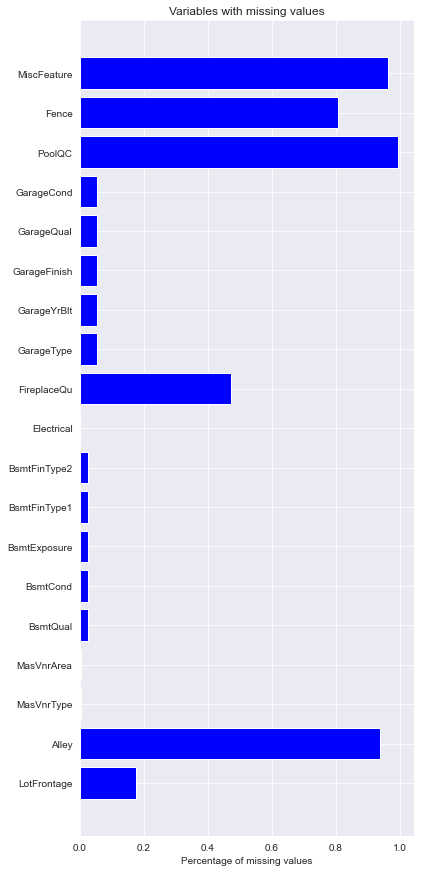

In [9]:
# Missing values in percentage terms
ind = np.arange(len(labels))

# Grid style
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(6, 15))

rects = ax.barh(ind, np.array(percentcount), color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Percentage of missing values")
ax.set_title("Variables with missing values")

Our dataset contains a few variables with missing values. We need to account for this in our following notebook, where we will engineer the variables for use in predictive model.

#### Relationship between values being missing and House Prices

Let's evaluate the price of the house for those cases where the information is missing, for each variable.

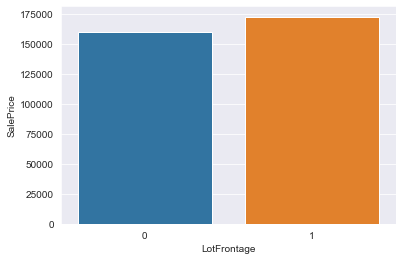

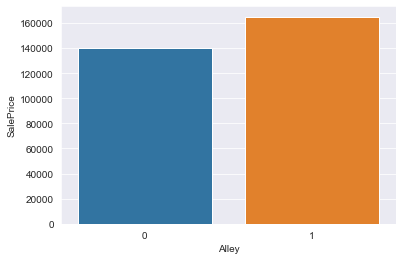

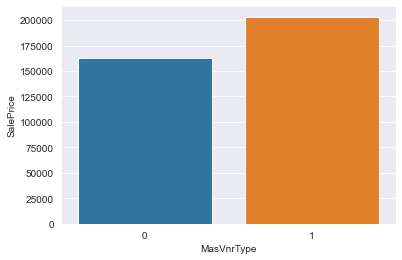

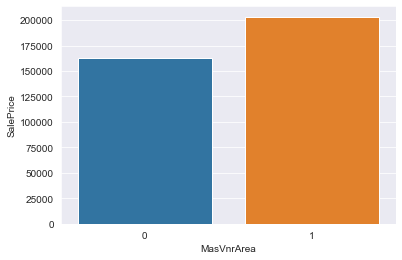

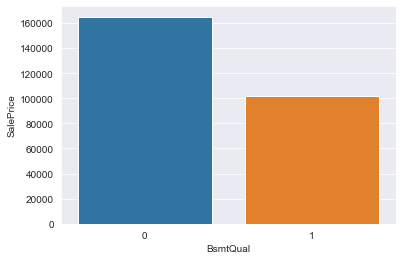

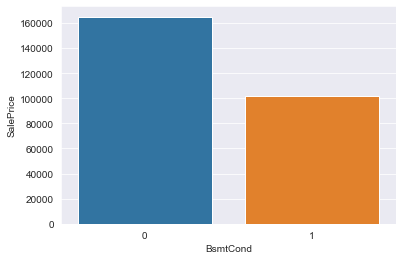

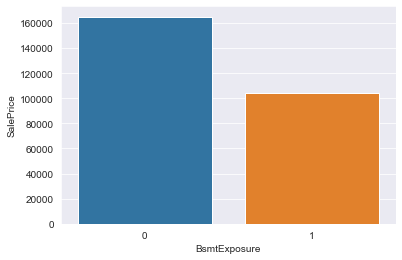

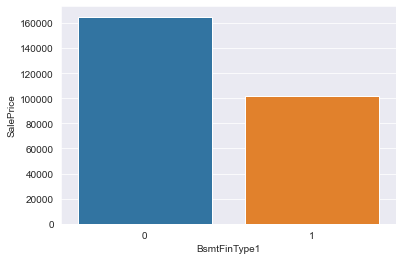

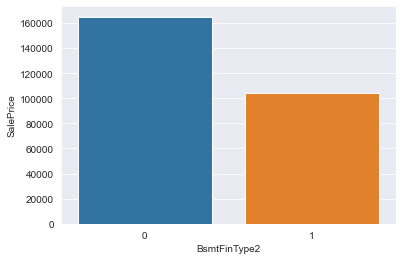

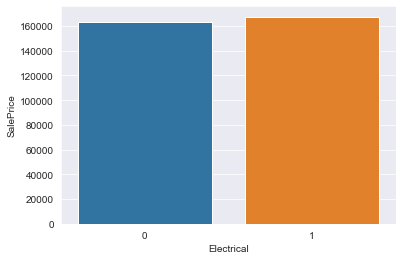

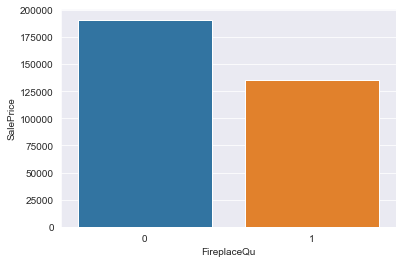

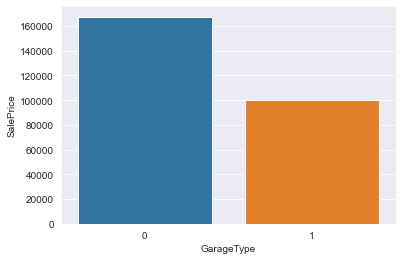

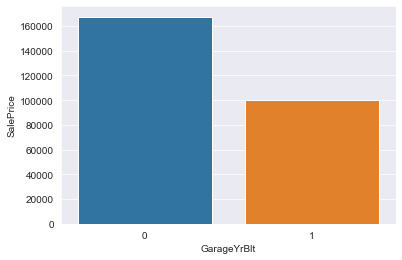

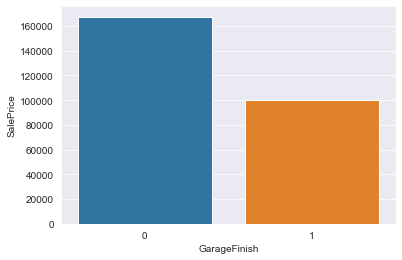

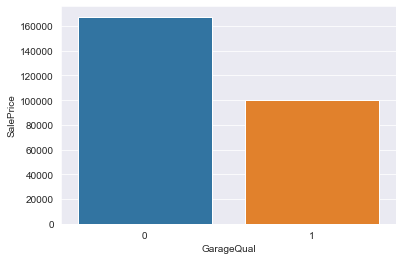

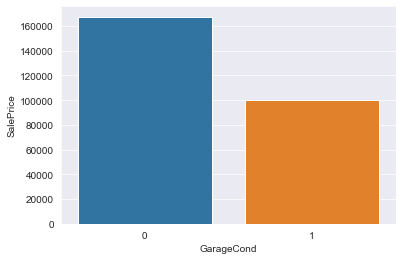

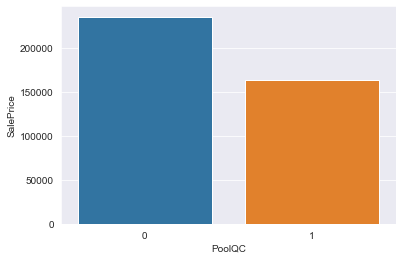

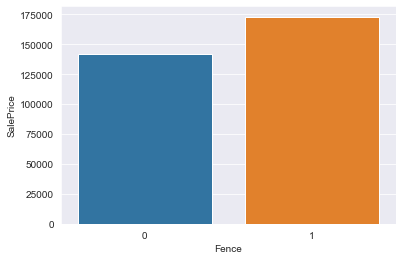

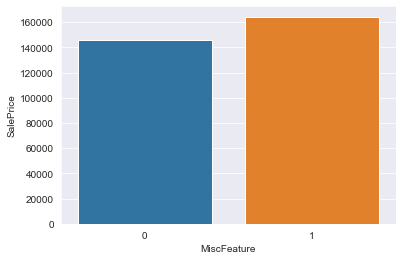

In [9]:
def analyse_na_value(data, var):
    df = data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)    
    groupedvalues=df.groupby(var)['SalePrice'].median().reset_index()

    g=sns.barplot(x=var,y='SalePrice',data=groupedvalues)

    plt.show()
    
for var in vars_with_na:
    analyse_na_value(train, var)

We see that for most of the variables with missing values the median Sale Price is low, i.e. there is a significant relationship between these variables and Sale price of houses. We will capture this information when we engineer the variables in our next notebook.

### <font color= '#810000'>Numerical variables</font>

Let's go ahead and find out what numerical variables we have in the dataset

In [14]:
# list of numerical variables
num_vars = [var for var in train.columns if train[var].dtypes != 'O' and var not in 'SalePrice']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
train[num_vars].head()

Number of numerical variables:  37


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


From the above view of the dataset, we notice the variable Id, which is an indicator of the house. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each house in the dataset. See below:

In [15]:
print('Number of House Id labels: ', len(train.Id.unique()))
print('Number of Houses in the Dataset: ', len(train))

Number of House Id labels:  1460
Number of Houses in the Dataset:  1460


Let's have a look first at the correlation between numerical features(except Id) and the target `SalePrice`, in order to have a first idea of the connections between features.

(array([0.5]), [Text(0, 0.5, 'SalePrice')])

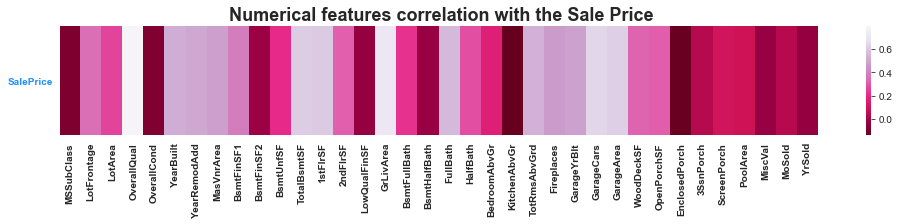

In [16]:
num=train.drop(['Id'], axis = 1).select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,2))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).drop(['SalePrice'], axis = 1).head(1), cmap='PuRd_r')
plt.title(" Numerical features correlation with the Sale Price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


Just by looking at the heatmap below we can see many dark colors, many features have high correlation with the target. To have a better idea, we can sort the features according to their correlation with the sale price.

In [17]:
num_corr=numcorr['SalePrice'].sort_values(ascending=False)[1:].to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = num_corr.style.background_gradient(cmap=cm)
s

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


Interesting! The overall quality, the `living area, basement area, garage cars and garage area have the highest correlation values with the sale price`, which is logical, better quality and bigger area = Higher price.

- Also some features such as, full bath or 1st floor surface have a higher correlation, those are luxury features, more luxury = Higher price.
- Year built, the newer buildings seem to have higher sale prices.
Example of a strong correlation between 2 numerical features: Sale price and ground living area

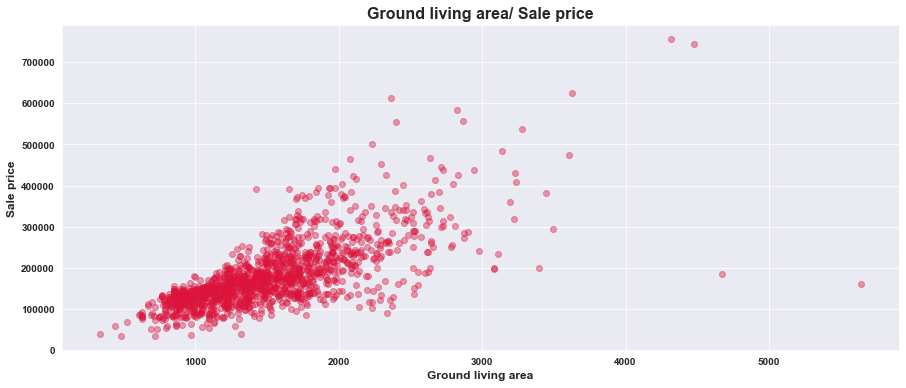

In [18]:
# scatter plot of Ground living area by Sales Price
plt.figure(figsize=(15,6))
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'], color='crimson', alpha=0.4)
plt.title('Ground living area/ Sale price', weight='bold', fontsize=16)
plt.xlabel('Ground living area', weight='bold', fontsize=12)
plt.ylabel('Sale price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

####  Temporal variables

From the above view we also notice that we have 4 year variables. Typically, we will not use date variables as is, rather we extract information from them. For example, the difference in years between the year the house was built and the year the house was sold. We need to take this into consideration in our next notebook, where we will engineer our features.

In [19]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [20]:
# let's explore the content of these year variables
for var in year_vars:
    print(var, train[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

As you can see, it refers to years.

We can also explore the evolution of the sale price with the years in which the house was sold:

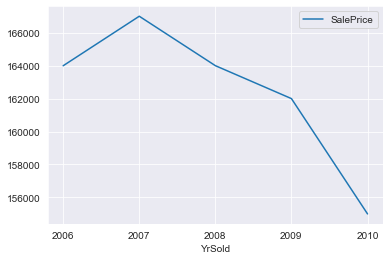

In [21]:
grouped = train.groupby('YrSold')['SalePrice'].median().reset_index()
ax = grouped.plot(x="YrSold",y="SalePrice")
ax.locator_params(integer=True)

plt.show()

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by.


Let's go ahead and explore whether there is a relationship between the year variables and SalePrice. For this, we will capture the elapsed years between the Year variables and the year in which the house was sold:

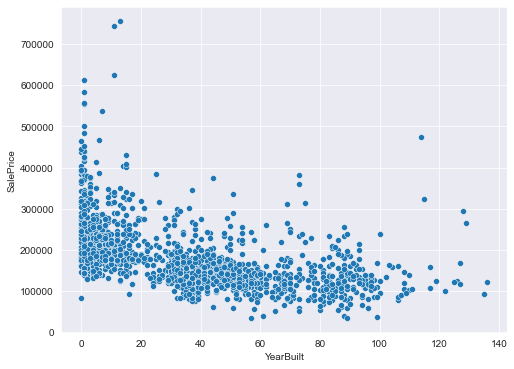

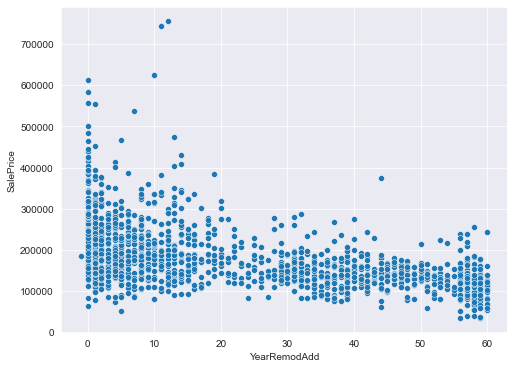

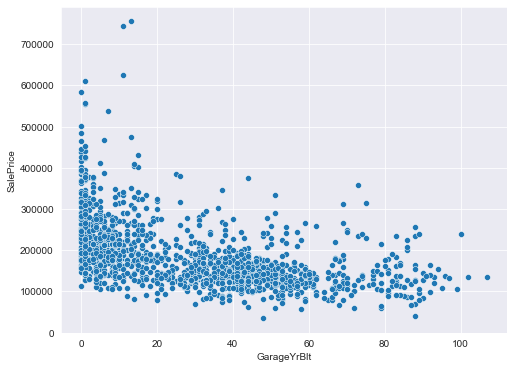

In [22]:
# let's explore the relationship between the year variables and the house price in a bit of more details
def analyse_year_vars(data, var):
    df = data.copy()
    
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var, y="SalePrice")
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(train, var)

We see that there is a tendency to a decrease in price, with older features.

#### Discrete variables

Let's go ahead and find which variables are discrete, i.e., variables that take a finite number of values

In [23]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(train[var].unique())<20 and var not in year_vars+['Id', 'SalePrice']]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  14


In [20]:
# let's visualise the discrete variables
train[discrete_vars].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


We can see that these variables tend to be related to house quality or grading scales, or refer to the number of rooms, or units. Let's go ahead and analyse their contribution to the house price.

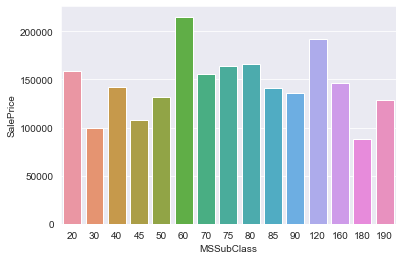

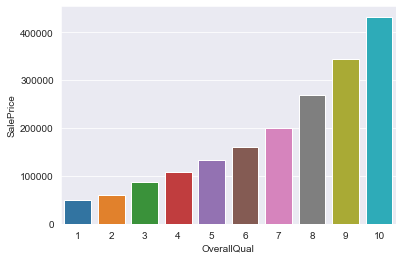

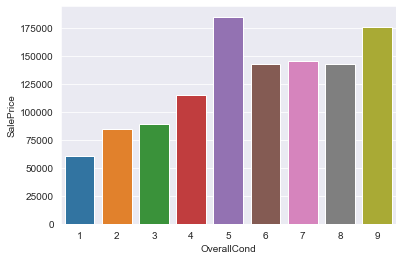

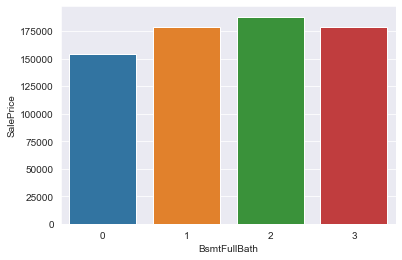

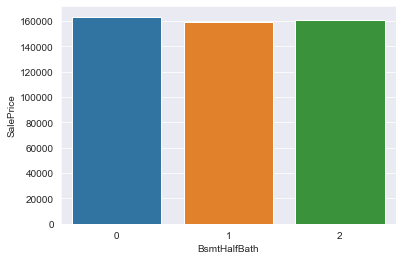

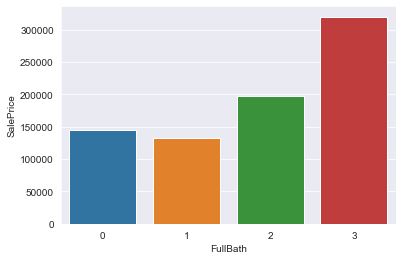

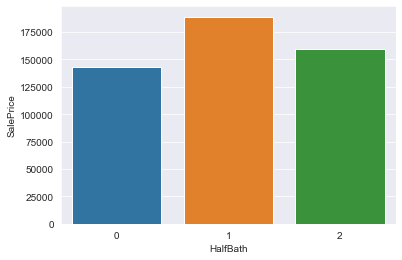

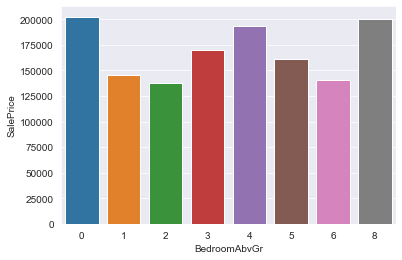

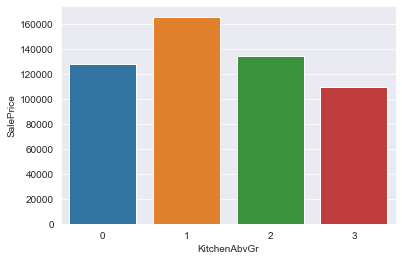

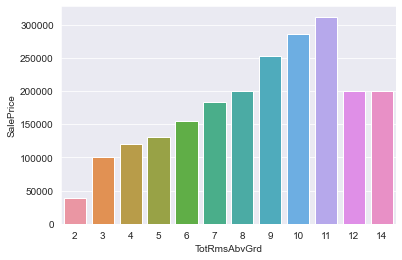

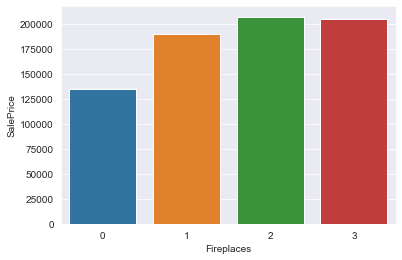

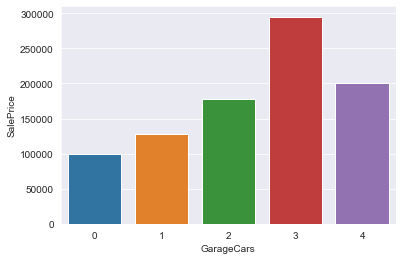

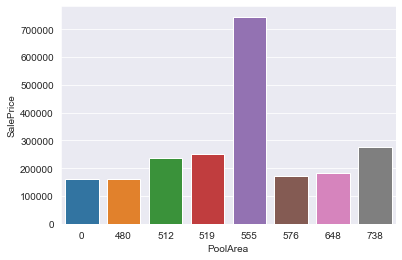

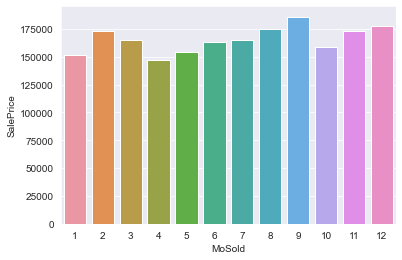

In [24]:
def analyse_discrete(data, var):
    grouped = data.groupby(var)['SalePrice'].median().reset_index()
    g=sns.barplot(x=var,y='SalePrice',data=grouped)
    
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(train, var)

We see that there is a relationship between the variable numbers and the SalePrice, but this relationship is not always monotonic. 

For example, for OverallQual, there is a monotonic relationship: the higher the quality, the higher the SalePrice.  

However, for OverallCond, the relationship is not monotonic. Clearly, some Condition grades, like 5, favour better selling prices, but higher values do not necessarily do so. We need to be careful on how we engineer these variables to extract the most for a linear model. 

There are ways to re-arrange the order of the discrete values of a variable, to create a monotonic relationship between the variable and the target. However, for the purpose of this course, we will not do that, to keep feature engineering simple.

#### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous all those that are not temporal or discrete variables in our dataset.

In [25]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars+['Id', 'SalePrice']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


In [26]:
# let's visualise the continuous variables
train[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


### <font color= '#810000'> Distribution of continuous variables </font>

Let's go ahead and find out which variables of the dataset contain missing values

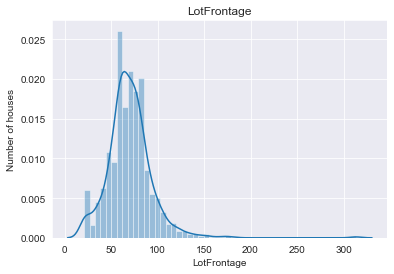

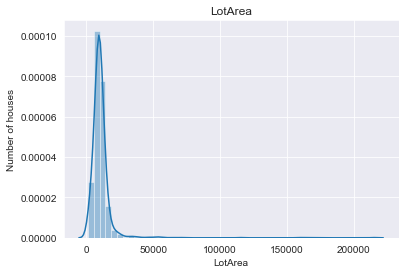

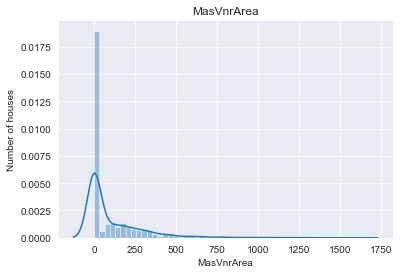

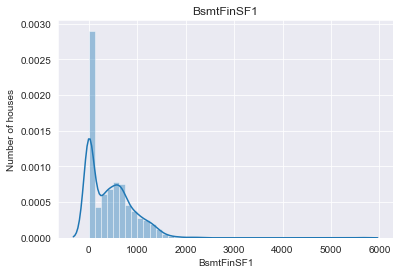

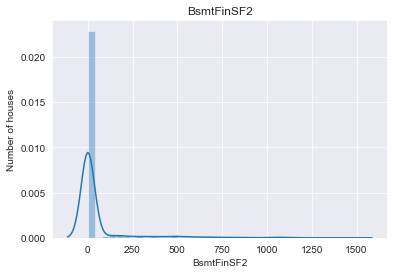

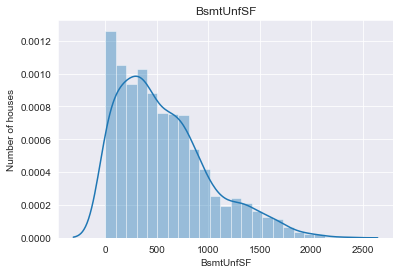

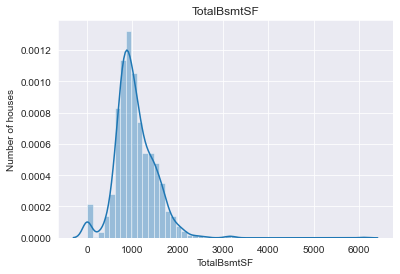

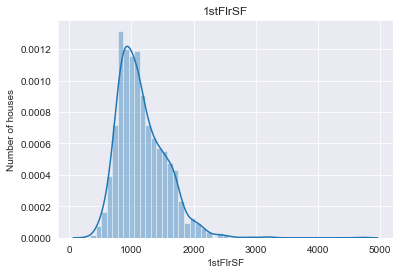

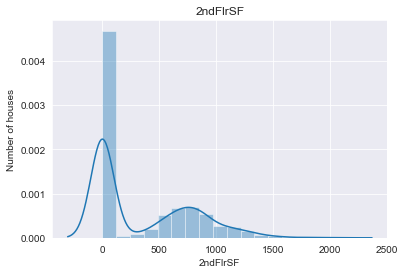

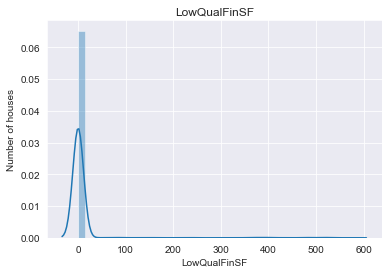

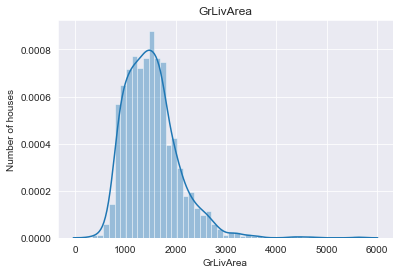

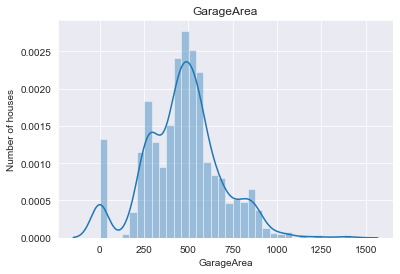

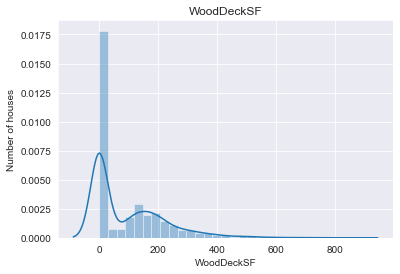

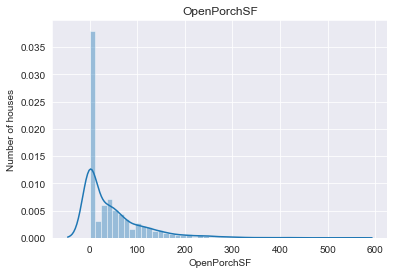

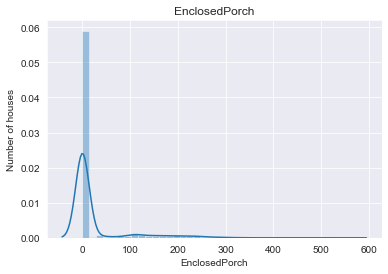

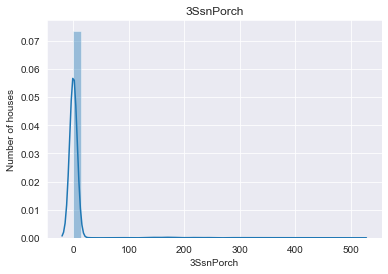

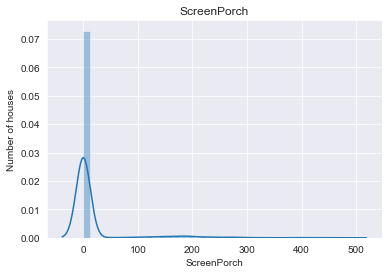

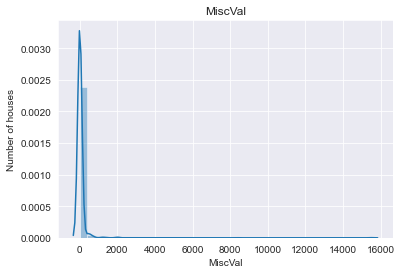

In [27]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(data, var):
    sns.distplot(data[var])
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(train, var)

We see that all of the above variables, are not normally distributed, including the target variable 'SalePrice'. 

Text(0.5, 1.0, 'SalePrice')

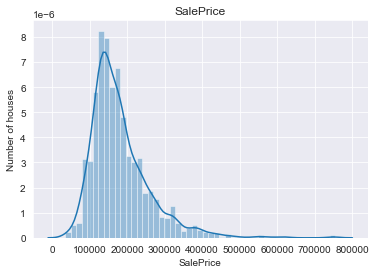

In [25]:
sns.distplot(train['SalePrice'])
plt.ylabel('Number of houses')
plt.xlabel('SalePrice')
plt.title('SalePrice')

For linear models to perform best, we need to account for non-Gaussian distributions. We will transform our variables later during our feature engineering section.

Let's also evaluate here if a log transformation renders the variables more Gaussian looking:

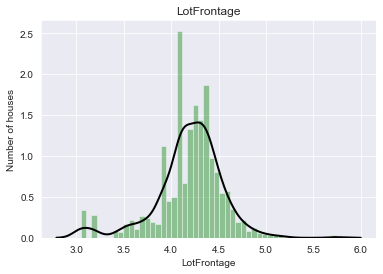

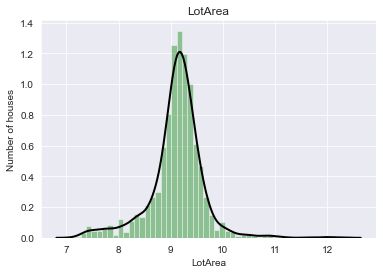

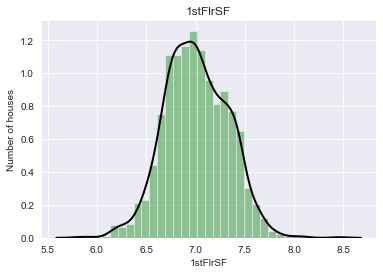

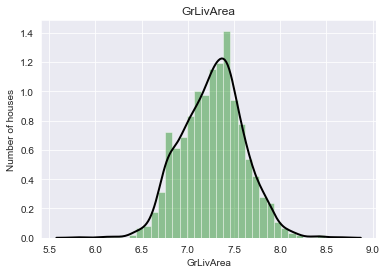

In [28]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(data, var):    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform the variable
        sns.distplot(np.log(data[var]), color = 'g',  kde_kws={"color": "k", "lw": 2})
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_vars:
    analyse_transformed_continous(train, var)

We get a better spread of values for most variables including Sale Price when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

Text(0.5, 1.0, 'SalePrice')

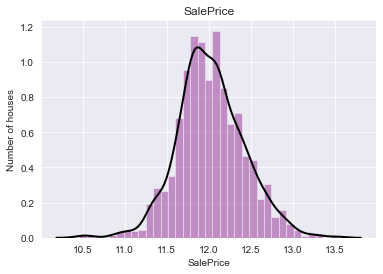

In [27]:
sns.distplot(np.log(train['SalePrice']),color = 'purple',  kde_kws={"color": "k", "lw": 2})
plt.ylabel('Number of houses')
plt.xlabel('SalePrice')
plt.title('SalePrice')

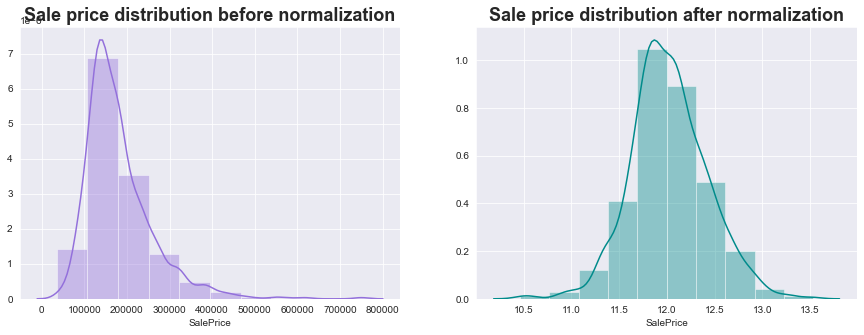

In [28]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot a simple histogram with binsize determined automatically
ax1 = sns.distplot(train.SalePrice, bins = 10, color='mediumpurple', ax=axes[0])
ax1.set_title('Sale price distribution before normalization',weight='bold', fontsize=18)
# Plot a kernel density estimate and rug plot
ax2 = sns.distplot(np.log1p(train.SalePrice), bins = 10,color='darkcyan', ax=axes[1])
ax2.set_title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

Let's explore the relationship between the house price and the transformed variables

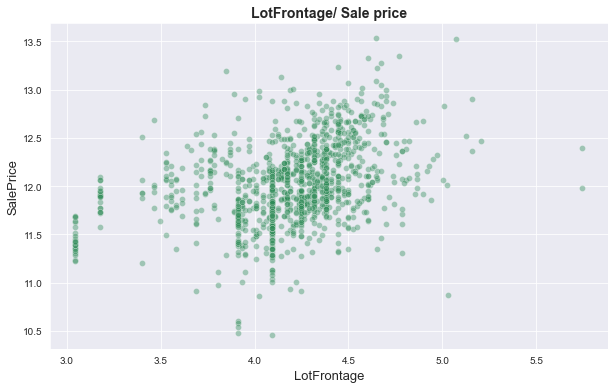

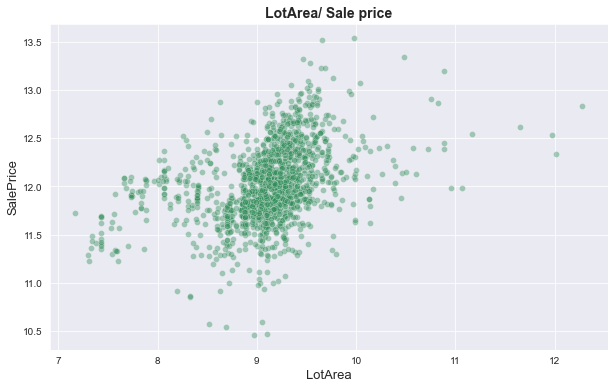

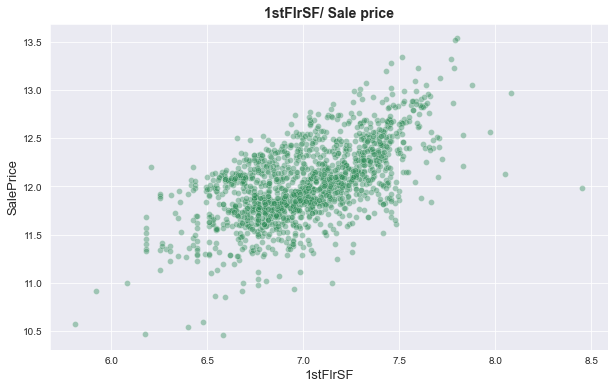

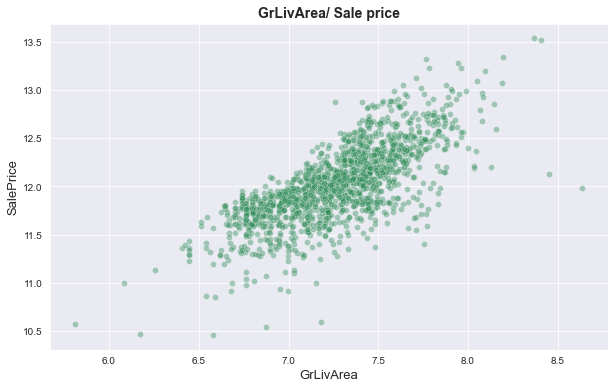

In [29]:

# with more detail
def transform_analyse_continous(data, var):    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform
        plt.figure(figsize=(10,6))
        s = sns.scatterplot(data = data, x=np.log(data[var]), y=np.log(train['SalePrice']), color='seagreen', alpha=0.4)
        s.set_xlabel("X Label",fontsize=13)
        s.set_ylabel("Y Label",fontsize=13)
        plt.ylabel('SalePrice')
        plt.xlabel(var)
        plt.title(f'{var}/ Sale price', weight='bold', fontsize=14)
        plt.show()
    
for var in cont_vars:
    if var !='SalePrice':
        transform_analyse_continous(train, var)

From the plots, we observe some monotonic associations between SalePrice and the variables to which we applied the log transformation, for example 'GrLivArea'.

We can also depict the correlation among the continuous variables.

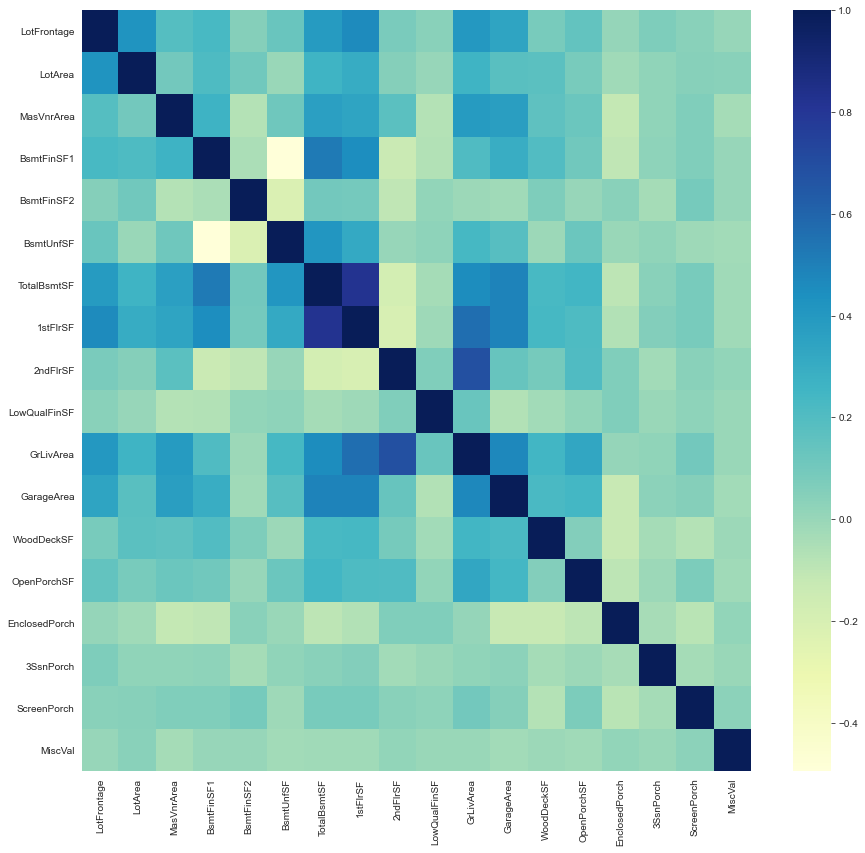

In [30]:
plt.figure(figsize=(15,14))
sns.heatmap(train[cont_vars].corr(), cmap="YlGnBu")

### <font color= '#810000'>Outliers </font>

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance.

Let's visualize the training data to detect outliers in some of the variables that can be relevant. 

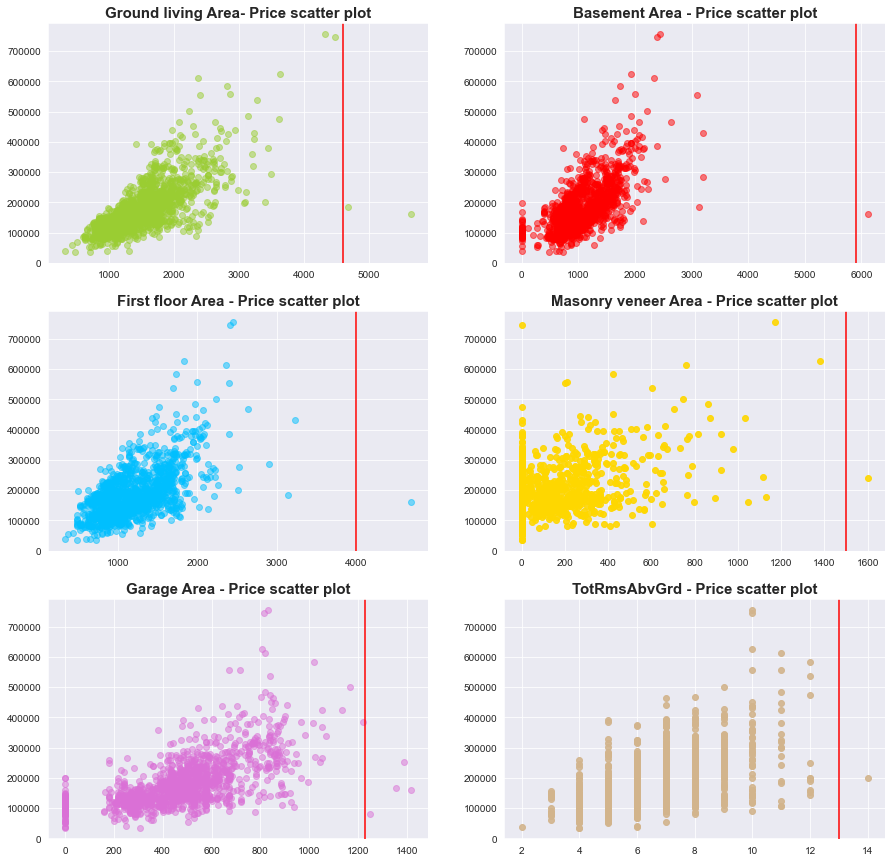

In [31]:
fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=train['TotalBsmtSF'], y=train['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=train['1stFlrSF'], y=train['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=train['MasVnrArea'], y=train['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=train['GarageArea'], y=train['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=train['TotRmsAbvGrd'], y=train['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

The outliers are the points in the right that have a larger area or value but a very low sale price. We localize those points by sorting their respective columns. 

**Outlier Localization** We sort the columns containing the outliers shown in the graph, we will use the function head() to show the outliers: head(number of outliers or dots shown in each plot)

In [30]:
train['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [31]:
train['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

In [32]:
train['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [33]:
train['1stFlrSF'].sort_values().tail(1)

1298    4692
Name: 1stFlrSF, dtype: int64

In [36]:
train['GarageArea'].sort_values(ascending=False).head(4)

1298    1418
581     1390
1190    1356
1061    1248
Name: GarageArea, dtype: int64

Interesting! The outlier in "basement" and "first floor" features is the same as the first outlier in ground living area: The outlier with index number 1298. We can safely remove these points in data cleaning step.

Let's make boxplots to visualise outliers in the continuous variables after log transformation. (Try np.log1p() instead and compare the outputs)

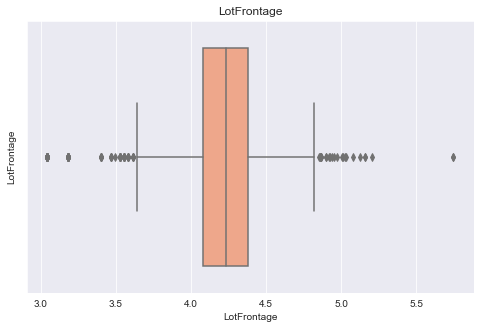

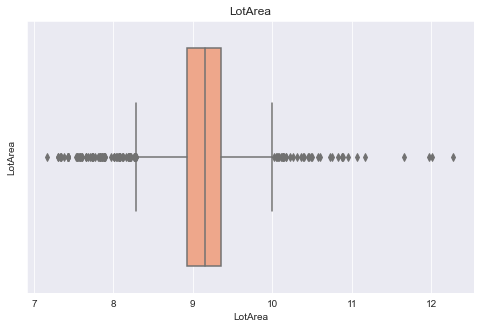

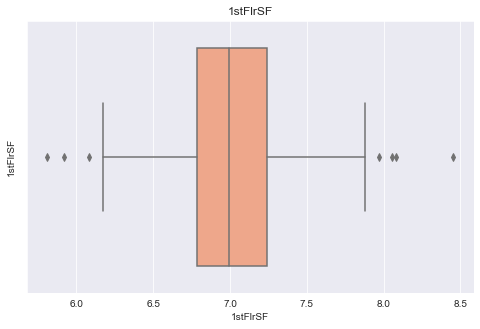

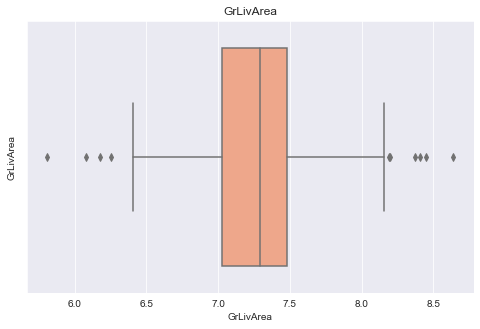

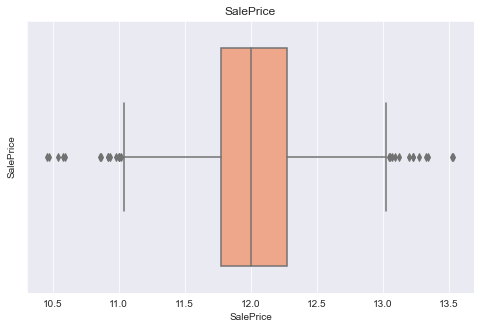

In [37]:
def find_outliers(data, var): 
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        plt.figure(figsize=(8,5))
        sns.boxplot(x=np.log(data[var]), color = 'lightsalmon')
        plt.title(var)
        plt.ylabel(var)
        plt.show()
    
for var in cont_vars+['SalePrice']:
    find_outliers(train, var)

The majority of the continuous variables seem to contain outliers. Outliers tend to affect the performance of linear model. So it is worth spending some time understanding if removing outliers will add performance value to our  final model.

### <font color= '#810000'>Categorical variables </font>

Let's go ahead and analyse the categorical variables present in the dataset.

In [34]:
### Categorical variables

cat_vars = [var for var in train.columns if train[var].dtypes=='O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  43


In [35]:
# let's visualise the values of the categorical variables
train[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

In [40]:
for var in cat_vars:
    print(var,': ', len(train[var].unique()), 'categories')

MSZoning :  5 categories
Street :  2 categories
Alley :  3 categories
LotShape :  4 categories
LandContour :  4 categories
Utilities :  2 categories
LotConfig :  5 categories
LandSlope :  3 categories
Neighborhood :  25 categories
Condition1 :  9 categories
Condition2 :  8 categories
BldgType :  5 categories
HouseStyle :  8 categories
RoofStyle :  6 categories
RoofMatl :  8 categories
Exterior1st :  15 categories
Exterior2nd :  16 categories
MasVnrType :  5 categories
ExterQual :  4 categories
ExterCond :  5 categories
Foundation :  6 categories
BsmtQual :  5 categories
BsmtCond :  5 categories
BsmtExposure :  5 categories
BsmtFinType1 :  7 categories
BsmtFinType2 :  7 categories
Heating :  6 categories
HeatingQC :  5 categories
CentralAir :  2 categories
Electrical :  6 categories
KitchenQual :  4 categories
Functional :  7 categories
FireplaceQu :  6 categories
GarageType :  7 categories
GarageFinish :  4 categories
GarageQual :  6 categories
GarageCond :  6 categories
PavedDrive :  

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during feature engineering.

#### Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [36]:
def analyse_rare_labels(data, var, rare_perc):
    tmp = data.groupby(var)['SalePrice'].count() / len(data)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(train, var, 0.05), end = '\n\n')


MSZoning
C (all)    0.006849
FV         0.044521
RH         0.010959
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Alley
Grvl    0.034247
Pave    0.028082
Name: SalePrice, dtype: float64

LotShape
IR2    0.028082
IR3    0.006849
Name: SalePrice, dtype: float64

LandContour
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: SalePrice, dtype: float64

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR2    0.032192
FR3    0.002740
Name: SalePrice, dtype: float64

LandSlope
Mod    0.044521
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blmngtn    0.011644
Blueste    0.001370
BrDale     0.010959
BrkSide    0.039726
ClearCr    0.019178
Crawfor    0.034932
IDOTRR     0.025342
MeadowV    0.011644
Mitchel    0.033562
NPkVill    0.006164
NoRidge    0.028082
SWISU      0.017123
SawyerW    0.040411
StoneBr    0.017123
Timber     0.026027
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
Artery    0.0

Some of the categorical variables show multiple labels that are present in less than 5% of the houses. We will engineer these variables later. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. That is why we want to remove them.

Finally, we want to explore the relationship between the categories of the different variables and the house price:

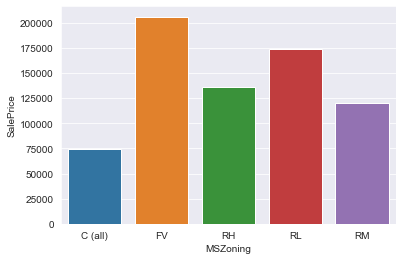

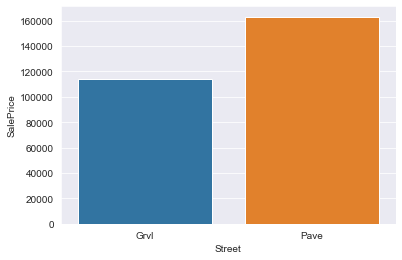

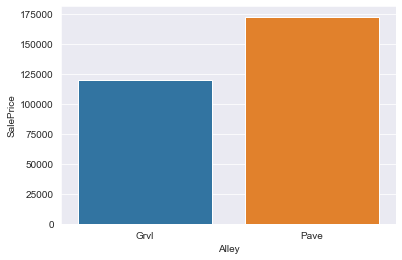

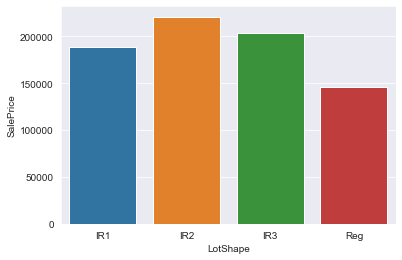

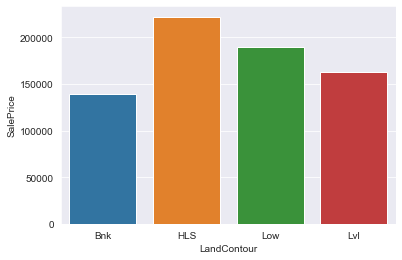

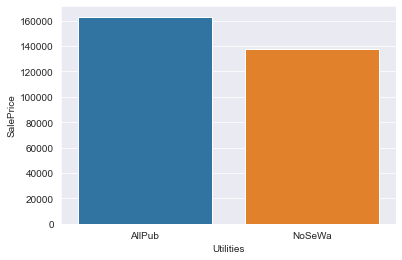

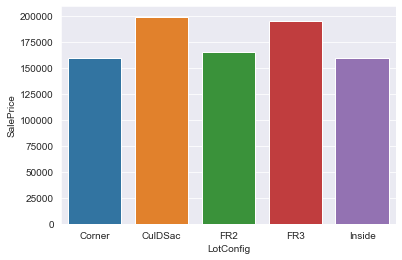

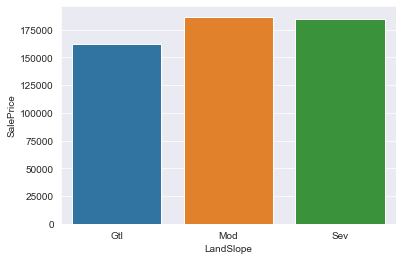

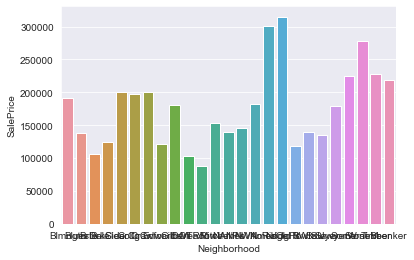

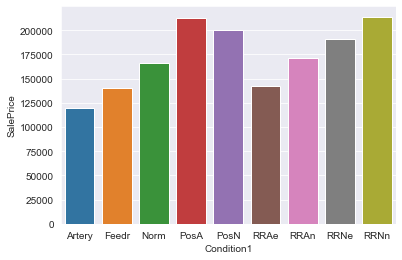

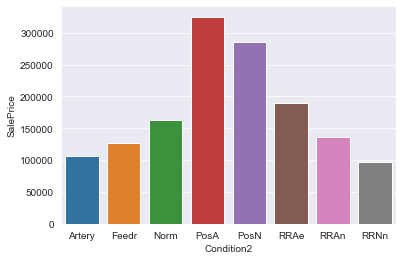

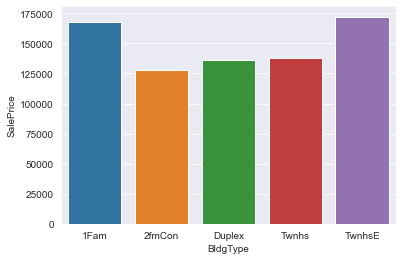

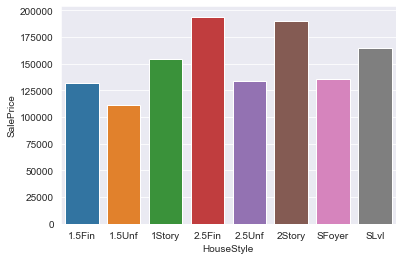

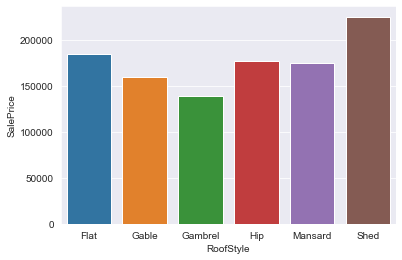

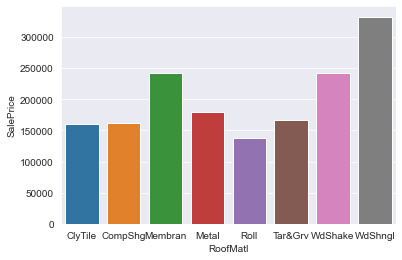

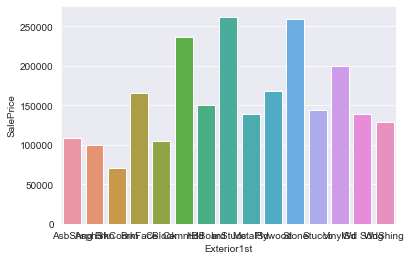

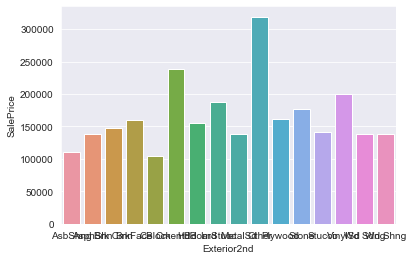

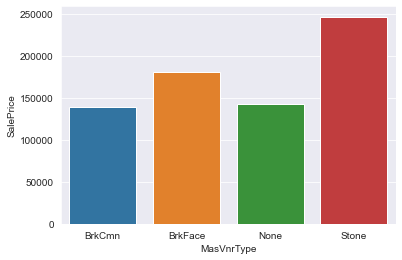

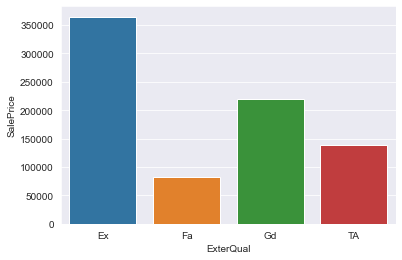

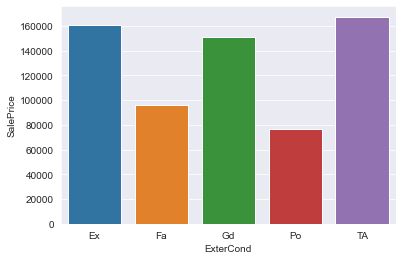

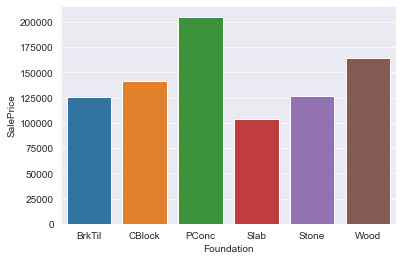

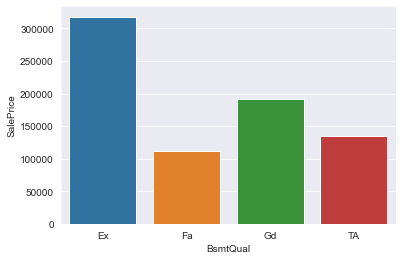

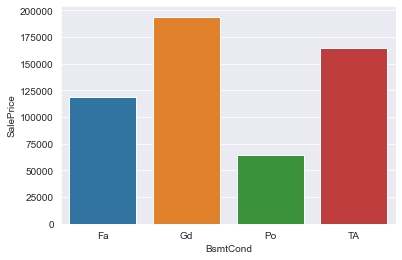

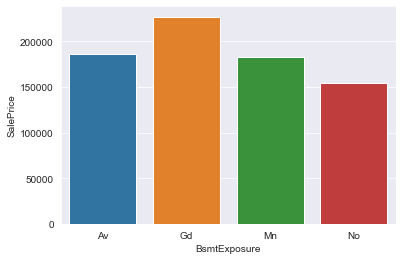

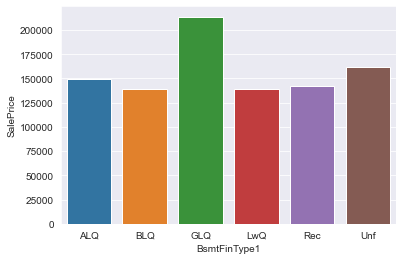

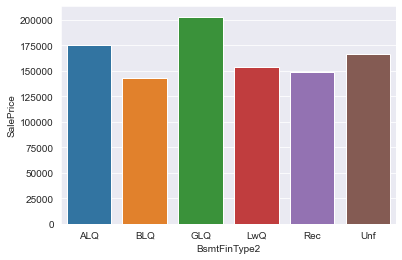

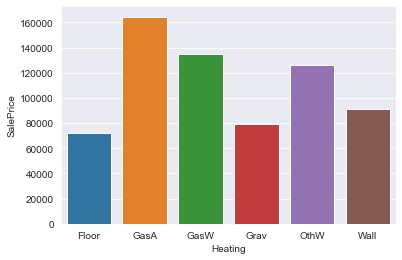

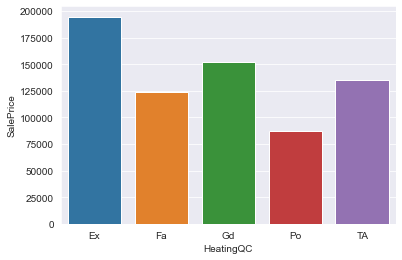

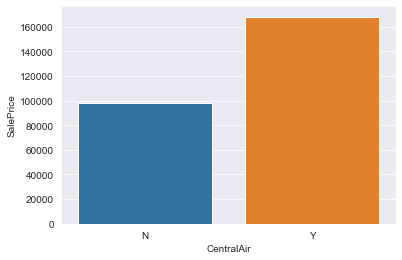

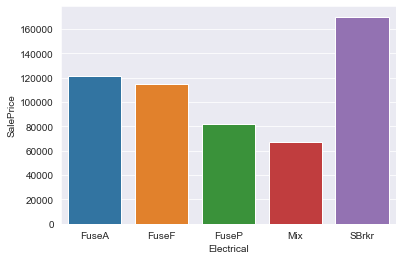

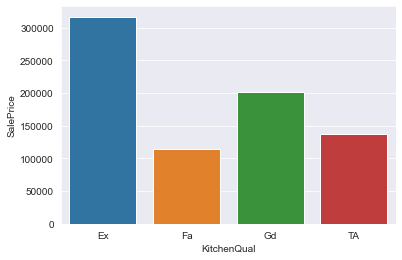

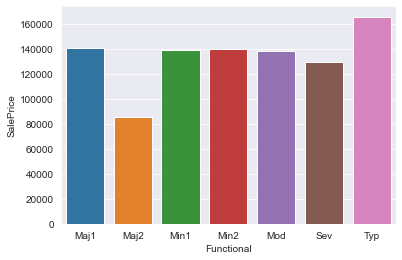

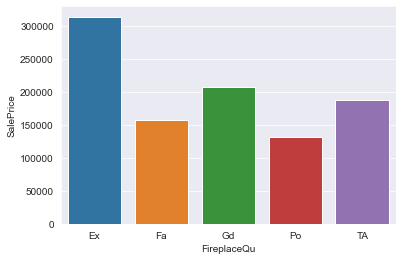

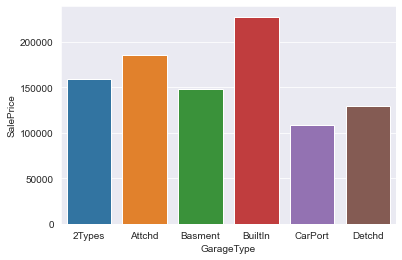

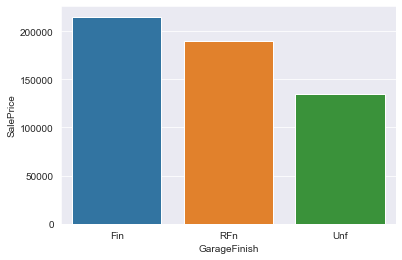

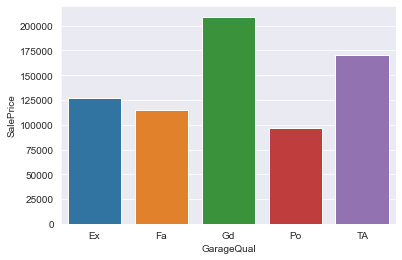

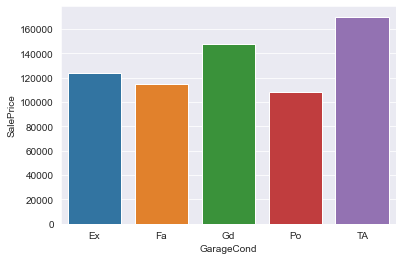

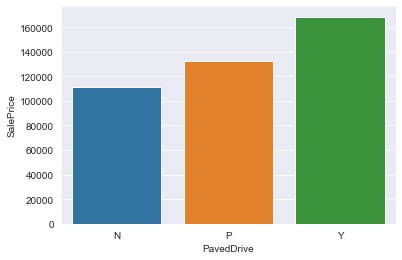

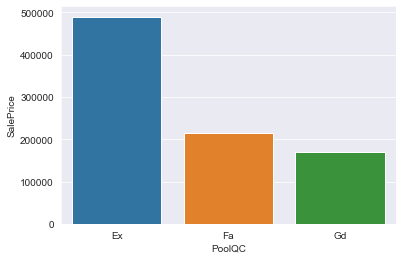

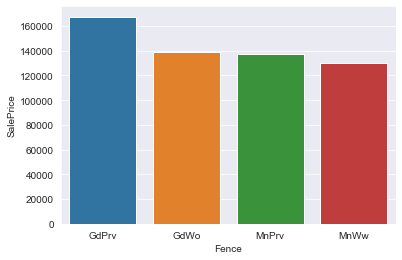

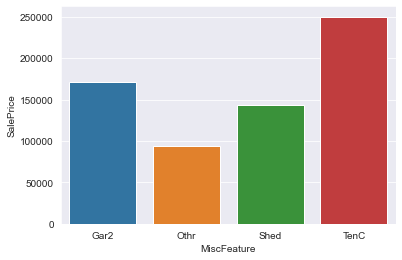

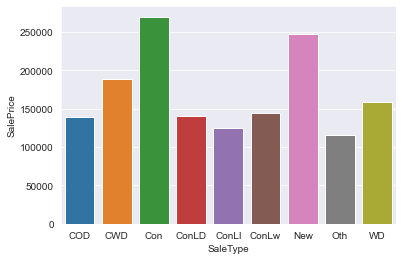

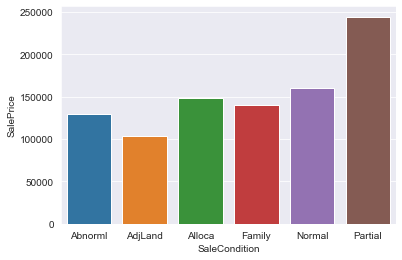

In [37]:
for var in cat_vars:
    analyse_discrete(train, var)

There are some categorical features that can be really significant for predicting house prices, for example, the neighborhood feature will be important, maybe the most important, given that good locations nowadays cost good money.

> Example of categorical features: `Neighborhood`, `building type` and `house styles`

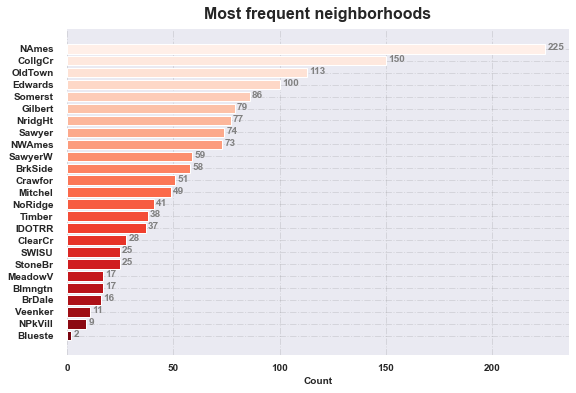

In [43]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))
sns.set_style("whitegrid")

# Horizontal Bar Plot
title_cnt=train.Neighborhood.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Reds',len(title_cnt)))


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Most frequent neighborhoods',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

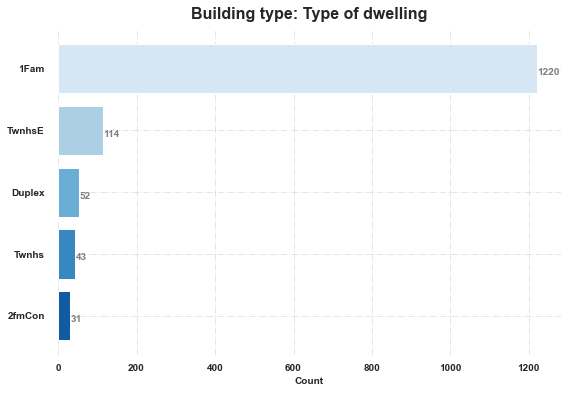

In [44]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))
sns.set_style("darkgrid")
# Horizontal Bar Plot
title_cnt=train.BldgType.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Blues',len(title_cnt)))




# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Building type: Type of dwelling',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')


plt.show()

In [45]:
def plot_cat(categories, data, column, title):

    HouseStyles = categories 
    h_s = data[column].value_counts()
    fig, ax = plt.subplots(1,1, figsize=(12, 6))
    ax.bar(h_s.index, h_s, width=0.55, 
          edgecolor='black', color=sns.color_palette("Purples", len(HouseStyles)),
          linewidth=0.6)

    for i in h_s.index:
        ax.annotate(f"{h_s[i]}", 
                   xy=(i, h_s[i] + 20),
                   va = 'center', ha='center',fontweight='light',
                   color='purple', weight='bold')


    for s in ['top', 'left', 'right']:
          ax.spines[s].set_visible(False)

    ax.set_xticklabels(h_s.index, rotation=0)

    #fig.text(0.09, 0.95, title, fontsize=15, fontweight='bold')
    plt.title(title, fontsize=15, weight='bold')
    ax.grid(axis='y', linestyle='-', alpha=0.4)    
    return plt.show()

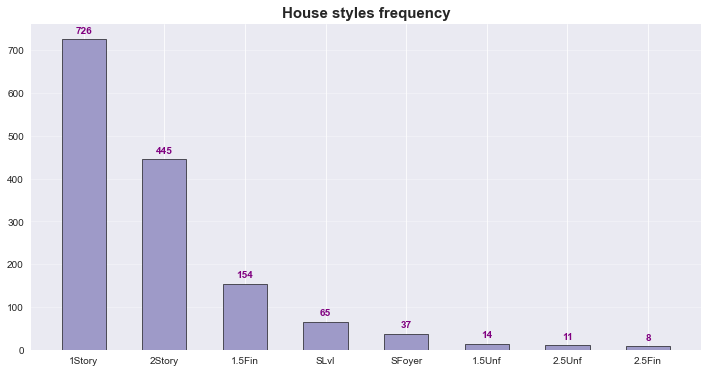

In [46]:
categories=['1Story', '2Story', '1.5Fin', 'SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'],
cat_column = 'HouseStyle'
title = 'House styles frequency'
plot_cat(categories, train, cat_column, title)

Clearly, the categories give information on the SalePrice. Next, we will transform these strings / labels into numbers, so that we capture this information and transform it into a monotonic relationship between the category and the house price.

**Disclaimer:**

This is by no means an exhaustive data exploration. There is certainly more to be done to understand the nature of this data and the relationship of these variables with the target, SalePrice.